## Optimization: Assignment 1

### Non-linear least squares problems and the Levenberg-Marquardt algorithm

#### Introduction to the algorithm

- Version of Gauss-Newton method where sum involving Hessians is replaced by matrix that is easier to compute, instead of being completely omitted
- The replacement is the identity matrix multiplied by a factor $\lambda$
- $\lambda$ is dynamically updated each iteration. We start with a value of 1. If the function value doesn't decrease, we keep this fairly large value the same. If the function value decreases, we set $\lambda_{k+1} = \lambda_k / 5$. 
- The motivation is to "dampen" the descent as we get closer to a minimum, to reduce the risk of overshooting, which would lead to slower convergence
- To summarize, in each iteration, direction is given by $p = $
- Since the squared loss is a convex function, the optimality condition is that the gradient vector is (arbitrarily close to) zero

In this demo we will test the LM code on two nonlinear least squares problems: the one given in the assigment and a cubic function with three parameters.

Let's start by importing the necessary packages and the class containing the optimization algorithm.

In [1]:
# Standard package imports

import numpy as np
import matplotlib.pyplot as plt
import jupyter_black

jupyter_black.load()

In [2]:
# Change working directory to core to enable codebase imports

import os

# os.chdir("..\\optimization-repo")
%load_ext autoreload
%autoreload 2

# Import Levenberg-Marquardt class from codebase

from levenberg_marquardt import LevenbergMarquardt

In [3]:
os.getcwd()

'C:\\Users\\nystrom jakob\\Documents\\002 Data science master\\006 Optimization\\003 Assignments\\optimization-repo'

### Test case 1: Exponential function given in the assignment

The model is given by 

$$
    y(t) = x_1 e^{x_2 t}
$$

We will test this on the datapoints in the assignment. Start by creating arrays with inputs and defining the function and gradient to be used.

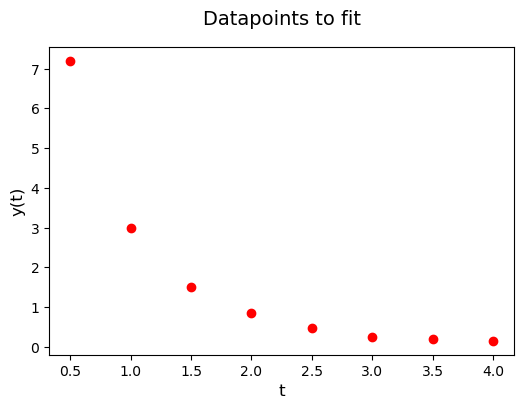

In [10]:
# Define values of t and y_t
t = np.arange(0.5, 4.5, 0.5)
y_t = np.array([7.2, 3.0, 1.5, 0.85, 0.48, 0.25, 0.20, 0.15])

# Create plot
plt.figure(figsize=(6, 4))
plt.title("Datapoints to fit", fontsize=14, pad=16)
plt.xlabel("t", fontsize=12)
plt.ylabel("y(t)", fontsize=12)

# Plot solution and original datapoints
plt.scatter(t, y_t, color="red")
plt.show()

In [11]:
# Define test function
def test_function_1(x_k):

    fx = y_t - (x_k[0] * np.exp(x_k[1] * t))
    return fx


# Define gradient function
def test_gradient_1(x_k):

    grad_fx = np.array([-np.exp(x_k[1] * t), -t * x_k[0] * np.exp(x_k[1] * t)])
    return grad_fx

#### 1.1) Run the algorithm with gradient function supplied

------ Output report ------

Successful convergence: True
Parameter values: [15.6208711  -1.57155106]
Function value (MSE): 0.021620584393120146
Number of iterations: 36
Final gradient vector: [-0.00073519  0.0002283 ]
Residual vector: [ 0.08099573 -0.24502716  0.02083228  0.17575691  0.17266248  0.10990757
  0.13614223  0.12089197]


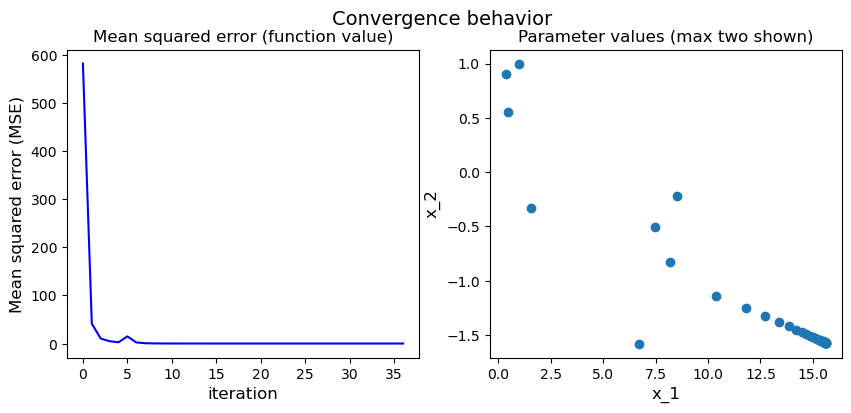

In [12]:
# Initialize optimizer WITH gradient argument
optimizer_1 = LevenbergMarquardt(
    func=test_function_1,
    grad=test_gradient_1,
    tol=1e-3,
    lambda_=1,
    alpha=1,
    max_iter=1000,
    plot_conv=True,
)

# Set initial parameter values
x0 = np.array([1, 1])

# Run optimizer
x_k, mse, y_diff = optimizer_1.minimize(x0)

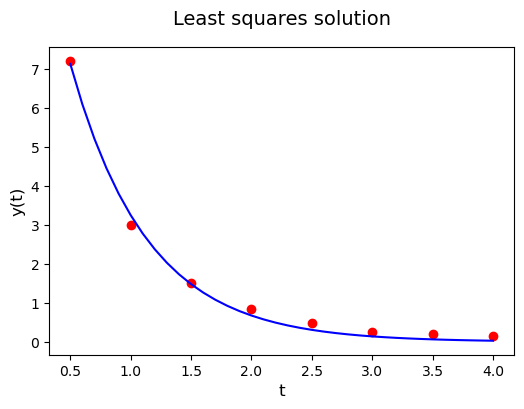

In [15]:
# Plot the results

# Create plot
plt.figure(figsize=(6, 4))
plt.title("Least squares solution", fontsize=14, pad=16)
plt.xlabel("t", fontsize=12)
plt.ylabel("y(t)", fontsize=12)

# Calculate least squares solution (line)
line_range = np.arange(min(t), max(t) + 0.1, 0.1)
line_values = [x_k[0] * np.exp(x_k[1] * line_range[i]) for i in range(len(line_range))]

# Plot solution and original datapoints
plt.scatter(t, y_t, color="red")
plt.plot(line_range, line_values, color="blue")
plt.show()

#### 1.2) Run the algorithm using numerically approximated gradient

------ Output report ------

Successful convergence: True
Parameter values: [15.62087029 -1.57155097]
Function value (MSE): 0.02162058454840933
Number of iterations: 36
Final gradient vector: [-0.00073519  0.00022831]
Residual vector: [ 0.08099581 -0.24502726  0.02083218  0.17575684  0.17266243  0.10990754
  0.13614221  0.12089196]


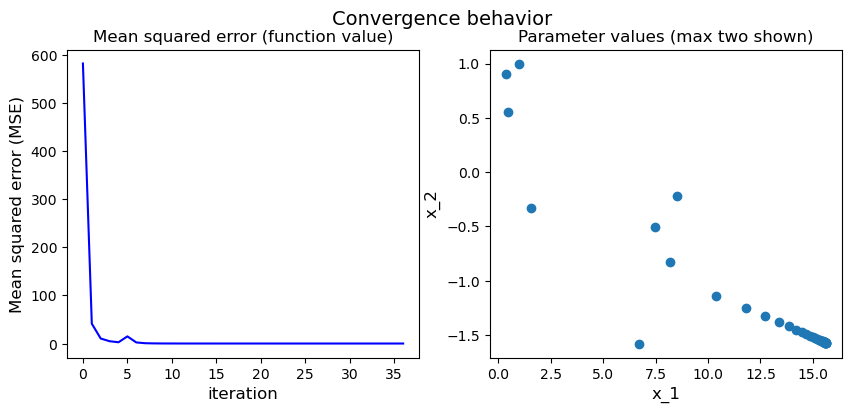

In [14]:
# Initialize optimizer WITHOUT gradient argument
optimizer_1 = LevenbergMarquardt(
    func=test_function_1,
    tol=1e-3,
    lambda_=1,
    alpha=1,
    max_iter=1000,
    plot_conv=True,
)

# Set initial parameter values
x0 = np.array([1, 1])

# Run optimizer
x_k, mse, y_diff = optimizer_1.minimize(x0)

### Test case 2: Cubic function

The model is now given by 

$$
    y(t) = x_1t + x_2t^2 - x_3t^3
$$

Datapoints (i.e. the "true" $y$-values) are simulated using the parameters $x = \{x_1 = 1, x_2 = 1.5, x_3 = -2\}$ and addition of a noise term $\epsilon \sim \mathcal{N}(0, 2)$.

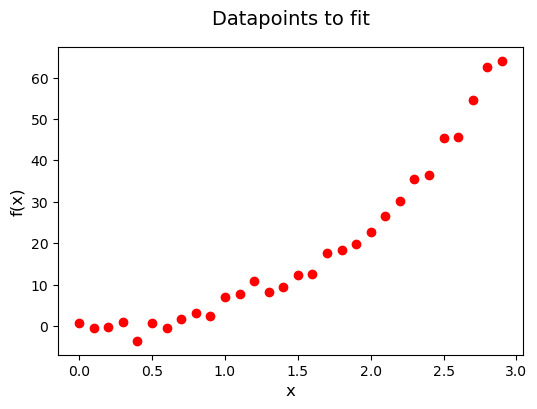

In [17]:
# Define values of t, y_t and x0
x_true = [1, 1.5, -2]
y_calc = (
    lambda t: x_true[0] * t + x_true[1] * np.power(t, 2) - x_true[2] * np.power(t, 3)
)
t = np.array(np.arange(0, 3, 0.1))
y_t = np.array([y_calc(t_val) for t_val in t]) + np.random.normal(
    loc=0, scale=2, size=(1, len(t))
)

# Create plot
plt.figure(figsize=(6, 4))
plt.title("Datapoints to fit", fontsize=14, pad=16)
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)

# Plot solution and original datapoints
plt.scatter(t, y_t, color="red")
plt.show()

In [18]:
# Define test function
def test_function_2(x_k):

    fx = y_t - (x_k[0] * t + x_k[1] * np.power(t, 2) - x_k[2] * np.power(t, 3))
    return fx


# Define gradient function
def test_gradient_2(x_k):

    grad_fx = np.array([-t, -2 * t, 3 * t])
    return grad_fx

#### 2.1) Run the algorithm with gradient function supplied

------ Output report ------

Successful convergence: True
Parameter values: [ 1.80232682  2.60465365 -1.40698047]
Function value (MSE): 5.181527869768505
Number of iterations: 98
Final gradient vector: [-0.00016482 -0.00032963  0.00049445]
Residual vector: [ 0.63467612 -0.60004909 -0.65170223  0.21904539 -4.77728295 -1.02841374
 -2.71127921 -1.38707049 -0.70835399 -2.24933577  1.14011351  0.77632617
  2.59055666 -1.51388091 -2.06308669 -1.00277569 -2.80195023  0.1039471
 -1.5181141  -2.72272262 -2.46266947 -1.80128073 -1.27748857  0.52349163
 -2.3562713   2.62349699 -1.23387629  3.14539978  6.2933268   2.65988361]


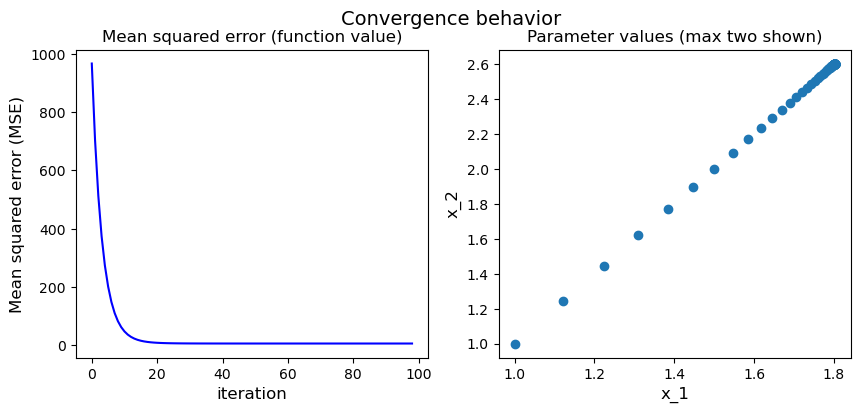

In [19]:
# Initialize optimizer WITH gradient argument
optimizer_2 = LevenbergMarquardt(
    func=test_function_2,
    grad=test_gradient_2,
    tol=1e-3,
    lambda_=1,
    alpha=0.1,
    max_iter=1000,
    plot_conv=True,
)

# Set initial parameter values
x0 = np.array([1, 1, 1])

# Run optimizer
x_k, mse, y_diff = optimizer_2.minimize(x0)

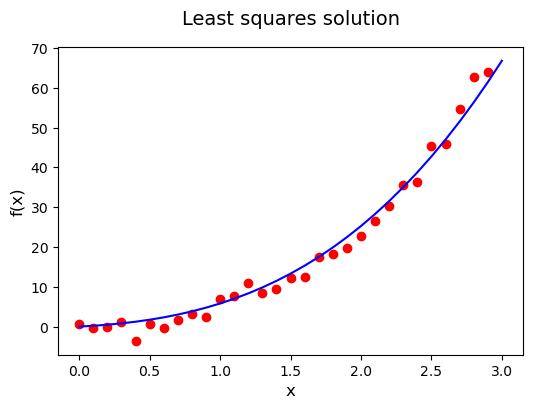

In [20]:
# Plot the results

# Create plot
plt.figure(figsize=(6, 4))
plt.title("Least squares solution", fontsize=14, pad=16)
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)

# Calculate least squares solution (line)
line_range = np.arange(min(t), max(t) + 0.1, 0.1)
line_values = [
    x_k[0] * i + x_k[1] * np.power(i, 2) - x_k[2] * np.power(i, 3) for i in line_range
]

# Plot solution and original datapoints
plt.scatter(t, y_t, color="red")
plt.plot(line_range, line_values, color="blue")
plt.show()

#### 2.2) Run the algorithm using numerically approximated gradient

------ Output report ------

Successful convergence: True
Parameter values: [ 1.56482671  0.81019617 -2.2131509 ]
Function value (MSE): 3.1627406093442914
Number of iterations: 157
Final gradient vector: [-0.00010094 -0.00022573  0.00058838]
Residual vector: [ 0.63467612 -0.55916058 -0.5388731   0.43003021 -4.44676437 -0.56182035
 -2.096907   -0.61805244  0.21733986 -1.16977316  2.36590083  2.1358571
  4.0665131   0.05634592 -0.42558162  0.67017845 -1.13021321  1.73296379
  0.02184202 -1.32300431 -1.25920325 -0.8549179  -0.65391744  0.75374572
 -2.5946966   1.83619291 -2.65509555  1.00039192  3.3298199  -1.2216698 ]


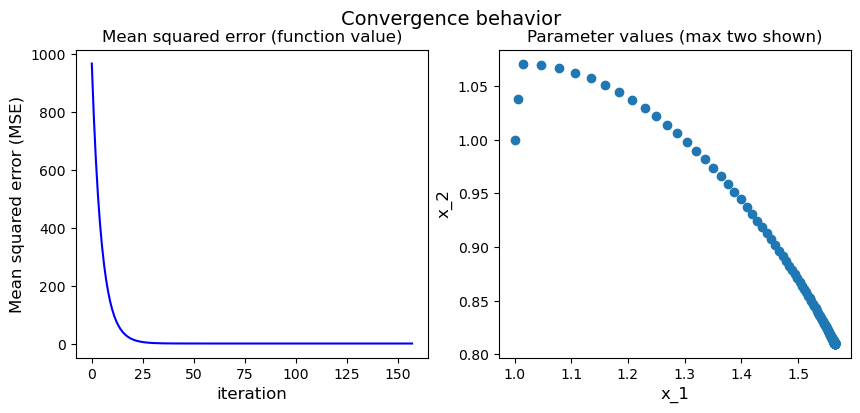

In [21]:
# Initialize optimizer WITH gradient argument
optimizer_2 = LevenbergMarquardt(
    func=test_function_2,
    tol=1e-3,
    lambda_=1,
    alpha=0.1,
    max_iter=1000,
    plot_conv=True,
)

# Set initial parameter values
x0 = np.array([1, 1, 1])

# Run optimizer
x_k, mse, y_diff = optimizer_2.minimize(x0)

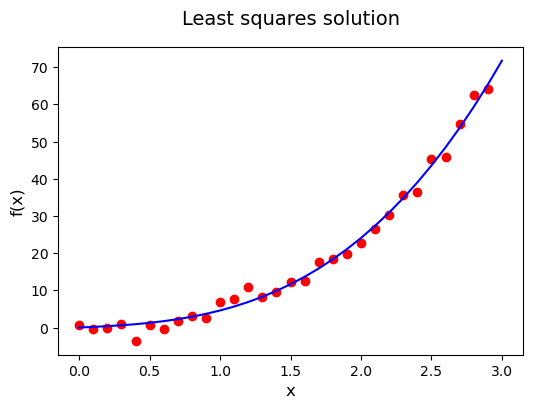

In [22]:
# Plot the results

# Create plot
plt.figure(figsize=(6, 4))
plt.title("Least squares solution", fontsize=14, pad=16)
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)

# Calculate least squares solution (line)
line_range = np.arange(min(t), max(t) + 0.1, 0.1)
line_values = [
    x_k[0] * i + x_k[1] * np.power(i, 2) - x_k[2] * np.power(i, 3) for i in line_range
]

# Plot solution and original datapoints
plt.scatter(t, y_t, color="red")
plt.plot(line_range, line_values, color="blue")
plt.show()

### Testing different start values